In [57]:
import pandas as pd

import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.options.display.max_columns=100
pd.options.display.max_rows=100


In [58]:
share_df=pd.read_csv('data/share-of-population-urban.csv')

print(share_df.dtypes)
#Because the Urban_Population column is an object data type, there is probably a corrupt value
print(share_df.shape)
share_df.head()

Entity              object
Code                object
Year                 int64
Urban_Population    object
dtype: object
(15072, 4)


,Entity,Code,Year,Urban_Population
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586


In [59]:
taxes_df=pd.read_csv('data/taxes-on-incomes-of-individuals-and-corporations-gdp.csv')
print(taxes_df.shape)
print(taxes_df.dtypes)
taxes_df.head(15)

(4871, 4)
Entity              object
Code                object
Year                 int64
Tax_Percent_GDP    float64
dtype: object


,Entity,Code,Year,Tax_Percent_GDP
0,Afghanistan,AFG,2003,0.165953
1,Afghanistan,AFG,2004,0.411647
2,Afghanistan,AFG,2005,0.320864
3,Afghanistan,AFG,2006,1.261181
4,Afghanistan,AFG,2007,1.323461
5,Afghanistan,AFG,2008,1.664719
6,Afghanistan,AFG,2009,2.608631
7,Afghanistan,AFG,2010,2.563413
8,Afghanistan,AFG,2011,2.573097
9,Afghanistan,AFG,2012,2.477800


## Data Cleaning

The Urban_Population column in the share_df is an object data type, meaning there is probably a corrupt value/float, since we need numeric values

In [60]:
share_df.Urban_Population.dtype

dtype('O')

In [61]:
share_df[share_df['Urban_Population'] =='88%']

,Entity,Code,Year,Urban_Population
220,American Samoa,ASM,2006,88%


In [62]:
type(share_df.loc[220, 'Urban_Population'])

str

In [63]:
#This shows that the % sign is implied in the remainder of the column
share_df[share_df['Entity'] =='American Samoa'][25:35]

,Entity,Code,Year,Urban_Population
199,American Samoa,ASM,1985,77.762
200,American Samoa,ASM,1986,78.408
201,American Samoa,ASM,1987,79.04
202,American Samoa,ASM,1988,79.659
203,American Samoa,ASM,1989,80.263
204,American Samoa,ASM,1990,80.948
205,American Samoa,ASM,1991,81.886
206,American Samoa,ASM,1992,82.789
207,American Samoa,ASM,1993,83.654
208,American Samoa,ASM,1994,84.485


In [64]:
#This cell corrects any value in Urban_Population with the % sign to be the correct float-value
share_df.Urban_Population = share_df.Urban_Population.apply(lambda x: float(x[:-1]) if x[-1]=='%' else float(x))
share_df.dtypes

Entity               object
Code                 object
Year                  int64
Urban_Population    float64
dtype: object

## Merging the two datasets

In [65]:
#Inner Joins join only shared keys. Here a combination of the Code column and Year column provides the key.
df = taxes_df.merge(share_df, on=['Code','Year'], how='inner')
print(df.shape)
df.head(20)

(4827, 6)


,Entity_x,Code,Year,Tax_Percent_GDP,Entity_y,Urban_Population
0,Afghanistan,AFG,2003,0.165953,Afghanistan,22.353
1,Afghanistan,AFG,2004,0.411647,Afghanistan,22.500
2,Afghanistan,AFG,2005,0.320864,x,22.703
3,Afghanistan,AFG,2006,1.261181,Afghanistan,22.907
4,Afghanistan,AFG,2007,1.323461,Afghanistan,23.113
5,Afghanistan,AFG,2008,1.664719,Afghanistan,23.320
6,Afghanistan,AFG,2009,2.608631,Afghanistan,23.528
7,Afghanistan,AFG,2010,2.563413,Afghanistan,23.737
8,Afghanistan,AFG,2011,2.573097,Afghanistan,23.948
9,Afghanistan,AFG,2012,2.477800,Afghanistan,24.160


In [66]:
#Column name Clean_up
df['Entity']=df['Entity_x']
df=df[['Entity', 'Code', 'Year', 'Tax_Percent_GDP',
       'Urban_Population']]
df.head()

,Entity,Code,Year,Tax_Percent_GDP,Urban_Population
0,Afghanistan,AFG,2003,0.165953,22.353
1,Afghanistan,AFG,2004,0.411647,22.500
2,Afghanistan,AFG,2005,0.320864,22.703
3,Afghanistan,AFG,2006,1.261181,22.907
4,Afghanistan,AFG,2007,1.323461,23.113


In [67]:
#Save merged to .csv
df.to_csv('data/merged_social_data.csv')

## Linear Regression

In [68]:
df.dtypes

Entity               object
Code                 object
Year                  int64
Tax_Percent_GDP     float64
Urban_Population    float64
dtype: object

### Relationship Check

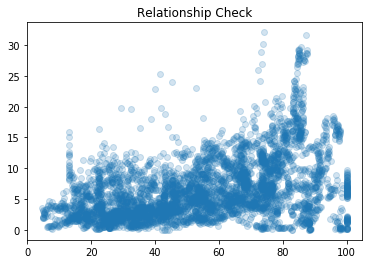

In [69]:
plt.scatter(df.Urban_Population, df.Tax_Percent_GDP, alpha = 0.2)
plt.title("Relationship Check")
plt.show()

In [72]:
df.corr(method='pearson')

,Year,Tax_Percent_GDP,Urban_Population
Year,1.000000,0.016151,0.099415
Tax_Percent_GDP,0.016151,1.000000,0.435102
Urban_Population,0.099415,0.435102,1.000000


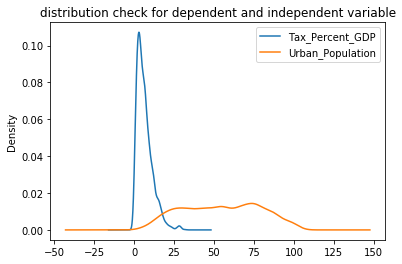

In [17]:
df[['Tax_Percent_GDP', 'Urban_Population']].plot.kde()
plt.title("distribution check for dependent and independent variable")
plt.show()

### Model Creation

In [29]:
lr_model = ols(formula='Tax_Percent_GDP~'+'Urban_Population', data=df).fit()
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tax_Percent_GDP   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          3.38e-222
Time:                        15:26:16   Log-Likelihood:                -14029.
No. Observations:                4827   AIC:                         2.806e+04
Df Residuals:                    4825   BIC:                         2.808e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6963      0.158     10.751      0.000       1.387       2.006
Urban_Population     0.0888      0.003     33.567      0.000       0.084       0.094
==============================================================================
Omnibus:                      888.216   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2171.610
Skew:                           1.021   Prob(JB):                         0.00
Kurtosis:                       5.574   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Spread of Residuals

In [54]:
predictions = lr_model.predict()

Text(0.5, 1.0, 'Residuals vs Fitted')

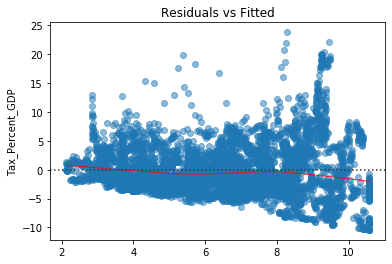

In [55]:
fig =  sns.residplot(predictions, 'Tax_Percent_GDP', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
fig.set_title('Residuals vs Fitted')


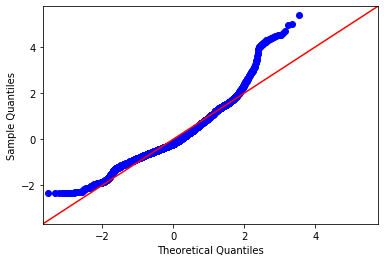

In [32]:
fig = sm.graphics.qqplot(lr_model.resid, dist=stats.norm, line='45', fit=True)
fig.show()

### Results Summary

#### R_Squared: 
18.9 % of the variability in the ratio of tax to GDP can be predicted by the variability of the percent of a country's population that lives in urban environments. The relationship between the two variables has a slight positive correlation. 

#### t-statistic (33.567):
The t-statistic is high enough according to the degress of freedom for us to reject the null hypothesis.

#### p-value(0.00): 
The p-value is 0.00 showing that the independent variable has some statistically significant relatinship to the dependent variable. The probability of achieving these results if the null hypothesis were true, that there is no relationship between proportion of population in Urban Environments and Tax to GDP ratio is 0.

#### Pearson-Correlation (0.435102):
Tax_Percent_GDP has a slight positive correlation with Urban_Population. 

### Reflection

#### a. What were some challenges you encountered in generating the dataset for analysis, if any?
Though not really a challenge, I had to research the meaning and relevance of the metric of Tax_Percent_GDP and how it is understood. Part of my research showed that in some cases higher taxes has a relationship with a country's ability to create urban infrastructure. 
One minor roadblock was catching the percent sign in the Urban_Population column. 

#### b. Based on this initial model, what steps might you take next to validate or extend your analysis, if any?
The steps I would want to take next would depend on the project's aims. If I wanted to better predict Tax to GDP, I would want to include more features like the country's unemployment or how much aid it receives. I would also want to try grouping countries by region (APAC, Americas, etc.).
To extend my analysis of Urban_Population's relationship to Tax_Percent_GDP I would want to capture meaningful insights from the current dataframe.  One initial step would be to include regions and to produce visualizations to better illuminate this relationship. For example, a visualization of what developing countries were most often below the IMF's Tax_to_GDP threshold of 15%. This could also help show what the model is getting wrong, if there is any commonality in the model's bigger errors. I would also want to see which countries had the biggest swing in Tax_Percent_GDP.

#### c. If you were asked to study this relationship, how would you convey your findings?
The proportion of a country's population that lives in an urban environment shows a slight positive correlation to acountry's tax to gdp ratio. 18.9% of the variance in Tax_to_GDP can be explained by the variance in a country's percentage of Urban_Population. The percent of a country's Urban_Population is shown to have a statistically significant relationship to Tax_to_GDP; it's high t-statistic and low p-value shows that the likelihood of having these results if Tax_to_GDP and Urban Population had no relationship is 0.